# Prerequisite

In [1]:
import pandas as pd
import numpy as np                # Numerical Python; Arrays ; Multi dimentional objects
import matplotlib.pyplot as plt   # creating static, animated, and interactive visualizations in Python
import datetime as dt
import seaborn as sns     # data visualization library
import re                 # Regular Expressions

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [106]:
customer = pd.read_csv("CUSTOMERS.csv")
customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


In [3]:
orderitem = pd.read_csv("ORDER_ITEMS.csv")
orderitem.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [4]:
pay = pd.read_csv("ORDER_PAYMENTS.csv")
pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
review = pd.read_csv("ORDER_REVIEW_RATINGS.csv")
review.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [6]:
order = pd.read_csv("ORDERS.csv")
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [7]:
prod = pd.read_csv("PRODUCTS.csv")
prod.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
seller = pd.read_csv("SELLERS.csv")
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [9]:
geo = pd.read_csv("GEO_LOCATION.csv")
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


# 1. Perform Detailed exploratory analysis

a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total 
products, Total categories, Total sellers, Total locations, Total channels, Total 
payment methods etc…

In [10]:
#Total Revenue
print("The total revenue is:",orderitem["price"].sum())

The total revenue is: 13591643.700000003


In [11]:
#Product Qty
print("The total prod quantity is:",prod["product_photos_qty"].sum())


The total prod quantity is: 70794.0


In [12]:
print("The total number of unique categories is:",prod["product_category_name"].nunique())

The total number of unique categories is: 71


In [13]:
print("The total number of unique products is:",prod["product_id"].nunique())
print("The total number of unique products is:",prod["product_id"].value_counts().sum())

The total number of unique products is: 32951
The total number of unique products is: 32951


In [14]:
print("The total number of unique sellers is:",seller["seller_id"].nunique())

The total number of unique sellers is: 3095


In [15]:
prod.isna().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [16]:
prod = prod.dropna()

In [17]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32327 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32327 non-null  object 
 1   product_category_name       32327 non-null  object 
 2   product_name_lenght         32327 non-null  float64
 3   product_description_lenght  32327 non-null  float64
 4   product_photos_qty          32327 non-null  float64
 5   product_weight_g            32327 non-null  float64
 6   product_length_cm           32327 non-null  float64
 7   product_height_cm           32327 non-null  float64
 8   product_width_cm            32327 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [18]:
prod.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [19]:
print("The total number of unique products  after dropping na is:",prod["product_id"].nunique())

The total number of unique products  after dropping na is: 32327


In [20]:
print("The total number of cities is:",geo["geolocation_city"].nunique())

The total number of cities is: 3809


In [21]:
print("The total number of zip code is:",geo["geolocation_zip_code_prefix"].nunique())

The total number of zip code is: 19015


In [22]:
print("The total number of payment types is:",pay["payment_type"].nunique())

The total number of payment types is: 5


In [23]:
seller.isna().sum()

seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64

In [24]:
seller = seller.dropna()
seller.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [25]:
order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [26]:
order = order.dropna()
order.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

# 1. b) Understanding how many new customers acquired every month

In [27]:
data = pd.merge(left=customer,right=order,how="inner",on="customer_id")

In [28]:
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,1/12/2018 20:48,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,5/19/2018 16:07,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,3/13/2018 16:06,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,7/29/2018 9:51,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...
96456,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,4/7/2018 15:48,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00
96457,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,4/4/2018 8:20,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00
96458,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,4/8/2018 20:11,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00
96459,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,11/3/2017 21:08,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00


In [29]:
data["order_purchase_timestamp"] = pd.to_datetime(data["order_purchase_timestamp"]) 
data["Month"] = data["order_purchase_timestamp"].dt.month
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,5
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,5
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,3
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96456,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,4
96457,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00,4
96458,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00,4
96459,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00,11


In [30]:
data["Year"] = data["order_purchase_timestamp"].dt.year

In [31]:
data["Month_Year"] = data["order_purchase_timestamp"].dt.to_period("M")

In [32]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month,Year,Month_Year
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,5,2017,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,1,2018,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,5,2018,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,3,2018,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,7,2018,2018-07


In [33]:
data.sort_values('Month_Year',ascending = True).head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month,Year,Month_Year
20503,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,Kandukur,Andhra Pradesh,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:00,9/15/2016 12:16,11/7/2016 17:11,11/9/2016 7:47,10/4/2016 0:00,9,2016,2016-09
3964,59b219b2e1d1b20580c3551e07db6648,27ede105a6042b71a261bf57f75fdcf8,21331,Badepalle,Andhra Pradesh,6460e331ee8f69c01f1423cca48d9991,delivered,2016-10-10 11:17:00,10/11/2016 5:02,11/20/2016 9:57,11/24/2016 15:44,12/2/2016 0:00,10,2016,2016-10
57074,b7335be40f14f35559f7222d4875b114,9b0f710c65ae9320f0acd6dfccc1b4d6,91720,Eluru,Andhra Pradesh,96caf486ad384c707d860dbb4e519794,delivered,2016-10-10 10:20:00,10/11/2016 8:57,10/15/2016 8:57,10/18/2016 9:57,12/2/2016 0:00,10,2016,2016-10
13164,46fc16f07712c5cdcdd55911a3297e16,3b6d8779a13d0e022d93c46e814de0fa,68638,Davlameti,Maharashtra,acf83f0e8fb878cb25197344426ed10b,delivered,2016-10-05 09:46:00,10/7/2016 2:49,10/11/2016 2:49,10/14/2016 2:49,12/9/2016 0:00,10,2016,2016-10
60802,cf5112cc5129776cc69c956dc265a5f7,2552194579775fed6641fa5f56152e0a,20511,Badepalle,Andhra Pradesh,f716dffba1232aaef7c899fb8c14db97,delivered,2016-10-07 15:12:00,10/7/2016 15:59,10/11/2016 15:59,10/14/2016 15:59,11/25/2016 0:00,10,2016,2016-10


In [34]:
data_new=data.groupby(["customer_unique_id"])[["Month_Year"]].min()
data_new

,Month_Year
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
0000f46a3911fa3c0805444483337064,2017-03
0000f6ccb0745a6a4b88665a16c9f078,2017-10
0004aac84e0df4da2b147fca70cf8255,2017-11
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2017-06
fffea47cd6d3cc0a88bd621562a9d061,2017-12
ffff371b4d645b6ecea244b27531430a,2017-02


In [35]:
df = pd.merge(left=data,right=data_new,on="customer_unique_id")
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month,Year,Month_Year_x,Month_Year_y
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,5,2017,2017-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,1,2018,2018-01,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,5,2018,2018-05,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,3,2018,2018-03,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,7,2018,2018-07,2018-07


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 96460
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96461 non-null  object        
 1   customer_unique_id             96461 non-null  object        
 2   customer_zip_code_prefix       96461 non-null  int64         
 3   customer_city                  96461 non-null  object        
 4   customer_state                 96461 non-null  object        
 5   order_id                       96461 non-null  object        
 6   order_status                   96461 non-null  object        
 7   order_purchase_timestamp       96461 non-null  datetime64[ns]
 8   order_approved_at              96461 non-null  object        
 9   order_delivered_carrier_date   96461 non-null  object        
 10  order_delivered_customer_date  96461 non-null  object        
 11  order_estimated

In [37]:
df.Month_Year_x.min()

Period('2016-09', 'M')

In [38]:
df.Month_Year_x.max()

Period('2018-08', 'M')

In [39]:
df[df['customer_unique_id'].duplicated() == True]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month,Year,Month_Year_x,Month_Year_y
6,802bb9a59876a712f8380da8f297057c,4c93744516667ad3b8f1fb645a3116a4,89253,Amadalavalasa,Andhra Pradesh,98b737f8bd00d73d9f61f7344aadf717,delivered,2017-10-15 12:44:00,10/15/2017 13:05,10/17/2017 20:05,10/25/2017 17:00,11/8/2017 0:00,10,2017,2017-10,2017-09
10,386e96046ce0e77e5c9a9a4e818da93c,1175e95fb47ddff9de6b2b06188f7e0d,81560,Anakapalle,Andhra Pradesh,7845a2492ab1b4f2cf3d56c7b8da1446,delivered,2018-01-18 12:35:00,1/18/2018 12:56,1/18/2018 23:42,1/23/2018 21:51,2/9/2018 0:00,1,2018,2018-01,2018-01
16,8ef1ad0f471589d02f59c9d914b030e1,295c05e81917928d76245e842748184d,5704,Akkarampalle,Andhra Pradesh,cf5e115a19c54f0457aa4c00fb88ae63,delivered,2018-06-06 11:59:00,6/6/2018 12:12,6/6/2018 17:28,6/12/2018 17:08,7/13/2018 0:00,6,2018,2018-06,2018-03
36,8d4093a730c51098399f993544697e73,e9dd12dca17352644a959d9dea133935,42800,Bollaram,Andhra Pradesh,f916cacb752116d552d42759c8da0cca,delivered,2018-03-05 18:12:00,3/5/2018 18:30,3/8/2018 0:58,5/4/2018 20:28,3/28/2018 0:00,3,2018,2018-03,2018-03
38,f0c0ed957add2cc4abeb60ade9ad6d19,e079b18794454de9d2be5c12b4392294,27525,Bugganipalle,Andhra Pradesh,7e3fefb35b0b1d765a343618ca5d454c,delivered,2017-06-14 18:52:00,6/16/2017 6:55,6/22/2017 8:11,6/24/2017 9:13,7/7/2017 0:00,6,2017,2017-06,2017-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92510,fd7bd57164ba6a5dd0d9e6b9b92a67ec,574e36a816bf7a295404e686062fc0de,12220,Bobbili,Andhra Pradesh,325c8590cc232d3faa8e49c293e7ea2c,delivered,2017-06-06 17:00:00,6/6/2017 17:50,6/7/2017 16:10,6/9/2017 14:27,6/20/2017 0:00,6,2017,2017-06,2017-06
92951,9e38a0715d956ca6c48e44feb01e3c00,76f7d40948174f5cde0fcf8e6147b59d,7194,Bestavaripeta,Andhra Pradesh,b95ee76467f40a43ca737b18839d83d6,delivered,2018-04-29 22:59:00,5/1/2018 5:55,5/3/2018 13:19,5/4/2018 20:28,5/17/2018 0:00,4,2018,2018-04,2017-12
93409,3fa57a1801314f5064ffebcc14d2063b,88fcb680dc8cd2e540010c0750b78242,13348,Mehmand,Chhattisgarh,00772b2af35643653f108fdac1155ee3,delivered,2017-04-24 10:53:00,4/24/2017 11:05,4/24/2017 11:15,5/6/2017 11:48,5/12/2017 0:00,4,2017,2017-04,2017-04
93830,56f1622201c6d8b17b1bc57367841538,2dcbfb99d95c7ba6eb992a98627f45b8,4890,Akkarampalle,Andhra Pradesh,ce5f998d724ed1ac61c890e33b24a33f,delivered,2017-11-28 01:16:00,11/28/2017 1:36,11/29/2017 18:54,12/2/2017 18:04,12/18/2017 0:00,11,2017,2017-11,2017-11


In [40]:
df["Type"]="New"
df.loc[df['Month_Year_x']>df['Month_Year_y'],'Type'] = "Existing"

In [41]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month,Year,Month_Year_x,Month_Year_y,Type
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,5,2017,2017-05,2017-05,New
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,1,2018,2018-01,2018-01,New
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,5,2018,2018-05,2018-05,New
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,3,2018,2018-03,2018-03,New
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,7,2018,2018-07,2018-07,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96456,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,4,2018,2018-04,2018-04,New
96457,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00,4,2018,2018-04,2018-04,New
96458,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00,4,2018,2018-04,2018-04,New
96459,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00,11,2017,2017-11,2017-11,New


In [42]:
df[df["Type"]=="Existing"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month,Year,Month_Year_x,Month_Year_y,Type
6,802bb9a59876a712f8380da8f297057c,4c93744516667ad3b8f1fb645a3116a4,89253,Amadalavalasa,Andhra Pradesh,98b737f8bd00d73d9f61f7344aadf717,delivered,2017-10-15 12:44:00,10/15/2017 13:05,10/17/2017 20:05,10/25/2017 17:00,11/8/2017 0:00,10,2017,2017-10,2017-09,Existing
16,8ef1ad0f471589d02f59c9d914b030e1,295c05e81917928d76245e842748184d,5704,Akkarampalle,Andhra Pradesh,cf5e115a19c54f0457aa4c00fb88ae63,delivered,2018-06-06 11:59:00,6/6/2018 12:12,6/6/2018 17:28,6/12/2018 17:08,7/13/2018 0:00,6,2018,2018-06,2018-03,Existing
35,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,Bollaram,Andhra Pradesh,19c0c76962278b152cc44fc63ffd5e48,delivered,2018-04-18 09:42:00,4/18/2018 9:55,4/20/2018 18:52,5/17/2018 20:19,5/18/2018 0:00,4,2018,2018-04,2018-03,Existing
91,5c4fbfda89ecf784397c5a99ec36601a,7a380cb5434e6b6b5b37d45bb99dbe8a,9890,Adoni,Andhra Pradesh,4941da6e1a4eef723674c7148152c4f6,delivered,2018-06-11 16:49:00,6/12/2018 4:57,6/12/2018 15:05,6/13/2018 18:39,6/26/2018 0:00,6,2018,2018-06,2018-05,Existing
117,fe6d73ac006153a398439253006e5adc,60f874c577dc096ecd52bd0bf6bd5942,36780,Kaghaznagar,Andhra Pradesh,e99f27b73c1fb9070310e00d081d3c96,delivered,2018-04-17 09:48:00,4/17/2018 10:55,4/17/2018 22:58,4/25/2018 22:16,5/8/2018 0:00,4,2018,2018-04,2018-02,Existing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92509,d489b58e4d66d84eddc981c68c83b4f4,574e36a816bf7a295404e686062fc0de,12220,Bobbili,Andhra Pradesh,25c0762610a416a21571e4ab3cf179b8,delivered,2018-04-26 18:07:00,4/26/2018 18:31,4/30/2018 16:03,5/2/2018 16:42,5/11/2018 0:00,4,2018,2018-04,2017-06,Existing
92951,9e38a0715d956ca6c48e44feb01e3c00,76f7d40948174f5cde0fcf8e6147b59d,7194,Bestavaripeta,Andhra Pradesh,b95ee76467f40a43ca737b18839d83d6,delivered,2018-04-29 22:59:00,5/1/2018 5:55,5/3/2018 13:19,5/4/2018 20:28,5/17/2018 0:00,4,2018,2018-04,2017-12,Existing
93408,ff1566bb6758a1a457e922cd7affcb2e,88fcb680dc8cd2e540010c0750b78242,13348,Mehmand,Chhattisgarh,eda613a4e8989dac08362e3326431eaa,delivered,2018-01-19 08:02:00,1/19/2018 8:15,1/22/2018 18:59,2/2/2018 15:42,2/16/2018 0:00,1,2018,2018-01,2017-04,Existing
93829,c590510c46287c15188b2263bd0bdc1c,2dcbfb99d95c7ba6eb992a98627f45b8,4890,Akkarampalle,Andhra Pradesh,4035b52134bcb1bdaf305b4671495372,delivered,2017-12-03 20:37:00,12/3/2017 20:55,12/5/2017 20:48,12/13/2017 20:09,12/26/2017 0:00,12,2017,2017-12,2017-11,Existing


In [43]:
df[df["Type"]=="New"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month,Year,Month_Year_x,Month_Year_y,Type
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,5,2017,2017-05,2017-05,New
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,1,2018,2018-01,2018-01,New
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,5,2018,2018-05,2018-05,New
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,3,2018,2018-03,2018-03,New
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,7,2018,2018-07,2018-07,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96456,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,4/13/2018 20:06,4/25/2018 0:00,4,2018,2018-04,2018-04,New
96457,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,4/11/2018 18:54,4/20/2018 0:00,4,2018,2018-04,2018-04,New
96458,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,5/9/2018 19:03,5/2/2018 0:00,4,2018,2018-04,2018-04,New
96459,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,11/16/2017 19:58,12/5/2017 0:00,11,2017,2017-11,2017-11,New


In [44]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month,Year,Month_Year_x,Month_Year_y,Type
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,5,2017,2017-05,2017-05,New
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,1,2018,2018-01,2018-01,New
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,5,2018,2018-05,2018-05,New
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,3,2018,2018-03,2018-03,New
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,7,2018,2018-07,2018-07,New


In [45]:
df.groupby(["Month_Year_x","Type"])[["Type"]].count()

Type
Month_Year_x Type          
2016-09      New          1
2016-10      New        270
2016-12      New          1
2017-01      Existing     1
             New        747
2017-02      Existing     2
             New       1639
2017-03      Existing     5
             New       2541
2017-04      Existing    19
             New       2284
2017-05      Existing    29
             New       3516
2017-06      Existing    43
             New       3092
2017-07      Existing    52
             New       3820
2017-08      Existing    60
             New       4133
2017-09      Existing    80
             New       4069
2017-10      Existing    93
             New       4385
2017-11      Existing   129
             New       7159
2017-12      Existing   118
             New       5395
2018-01      Existing   135
             New       6934
2018-02      Existing   120
             New       6436
2018-03      Existing   143
             New       6860
2018-04      Existing   165
             New       6633
2018-05      Existing   193
             New       6556
2018-06      Existing   188
             New       5908
2018-07      Existing   152
             New       6004
2018-08      Existing   171
             New       6180

# d)How the revenues from existing/new customers on month on month basis

In [46]:
revenue = pd.merge(left=df,right=orderitem,on="order_id")
revenue

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,Year,Month_Year_x,Month_Year_y,Type,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,2017,2017-05,2017-05,New,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,...,2018,2018-01,2018-01,New,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,...,2018,2018-05,2018-05,New,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,...,2018,2018-03,2018-03,New,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,...,2018,2018-07,2018-07,New,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110175,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,...,2018,2018-04,2018-04,New,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,4/12/2018 16:08,74.90,13.88
110176,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,...,2018,2018-04,2018-04,New,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,4/10/2018 8:35,114.90,14.16
110177,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,...,2018,2018-04,2018-04,New,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,4/12/2018 20:30,37.00,19.04
110178,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,...,2017,2017-11,2017-11,New,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,11/9/2017 21:15,689.00,22.07


In [47]:
month_revenue = revenue.groupby(["Type","Month_Year_x"])[["price"]].sum()
month_revenue

price
Type     Month_Year_x           
Existing 2017-01           10.90
         2017-02           76.12
         2017-03          517.79
         2017-04         2031.75
         2017-05         4379.72
         2017-06         4988.24
         2017-07         6562.13
         2017-08         8677.93
         2017-09         9616.60
         2017-10        11352.37
         2017-11        15151.31
         2017-12        16189.61
         2018-01        17911.65
         2018-02        13383.95
         2018-03        16163.86
         2018-04        20868.61
         2018-05        24404.64
         2018-06        25378.11
         2018-07        20008.90
         2018-08        18517.56
New      2016-09          134.97
         2016-10        40941.30
         2016-12           10.90
         2017-01       111701.57
         2017-02       232562.74
         2017-03       358681.06
         2017-04       338637.93
         2017-05       484779.53
         2017-06       416935.13
         2017-07       475042.39
         2017-08       546021.77
         2017-09       597604.07
         2017-10       636895.28
         2017-11       972496.76
         2017-12       709843.58
         2018-01       906733.35
         2018-02       813083.17
         2018-03       937192.39
         2018-04       952665.48
         2018-05       953140.05
         2018-06       830213.86
         2018-07       847477.57
         2018-08       820059.08

# e)Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [48]:
revenue.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,Year,Month_Year_x,Month_Year_y,Type,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,2017,2017-05,2017-05,New,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,...,2018,2018-01,2018-01,New,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,...,2018,2018-05,2018-05,New,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,...,2018,2018-03,2018-03,New,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,...,2018,2018-07,2018-07,New,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25


In [49]:
df1=pd.merge(revenue,pay,on="order_id")

In [50]:
df1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,...,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,5/20/2018 16:19,6/11/2018 14:31,...,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,6/5/2018 16:19,139.94,17.79,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,3/13/2018 17:29,3/27/2018 23:22,...,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,3/27/2018 16:31,149.94,23.36,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,7/29/2018 10:10,7/30/2018 15:16,...,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,7/31/2018 10:10,230.00,22.25,1,credit_card,8,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115013,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,4/7/2018 16:08,4/11/2018 2:08,...,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,4/12/2018 16:08,74.90,13.88,1,credit_card,6,88.78
115014,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,4/4/2018 8:35,4/5/2018 18:42,...,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,4/10/2018 8:35,114.90,14.16,1,credit_card,3,129.06
115015,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,4/8/2018 20:30,4/9/2018 17:52,...,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,4/12/2018 20:30,37.00,19.04,1,credit_card,5,56.04
115016,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,11/3/2017 21:31,11/6/2017 18:24,...,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,11/9/2017 21:15,689.00,22.07,1,credit_card,2,711.07


In [51]:
df2 = pd.merge(df1,prod,on="product_id")

In [52]:
df2

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,2,146.87,Office_Furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:00,11/10/2017 0:47,11/22/2017 1:43,...,1,275.79,Office_Furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:00,11/10/2017 0:47,11/22/2017 1:43,...,1,275.79,Office_Furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:00,5/8/2017 22:22,5/19/2017 20:16,...,7,140.61,Office_Furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:00,2/4/2018 22:29,2/19/2018 18:21,...,10,137.58,Office_Furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113362,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,Akkarampalle,Andhra Pradesh,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:00,3/27/2017 23:23,3/28/2017 14:18,...,1,30.95,Pet_Shop,43.0,779.0,1.0,300.0,16.0,16.0,16.0
113363,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,Deoranian,Uttar Pradesh,45b3000bcd10464ac178f32cd783fc83,delivered,2017-12-07 23:55:00,12/9/2017 23:50,12/11/2017 20:29,...,4,304.11,Health_Beauty,40.0,1694.0,1.0,2400.0,33.0,10.0,16.0
113364,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,Akkarampalle,Andhra Pradesh,49645a8902c1ba980836b7bff991d69f,delivered,2018-04-04 17:50:00,4/4/2018 18:08,4/5/2018 16:36,...,3,92.36,Fashion_Bags_Accessories,29.0,498.0,4.0,300.0,16.0,16.0,11.0
113365,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,Jalda,Orissa,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:00,11/14/2017 12:15,11/27/2017 20:44,...,5,167.79,Electronics,33.0,63.0,1.0,6185.0,63.0,11.0,20.0


In [53]:
df_final = pd.merge(df2,review,on="order_id")

In [54]:
df_final

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,1141.0,1.0,8683.0,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4,5/26/2017 0:00,5/30/2017 22:34
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:00,11/10/2017 0:47,11/22/2017 1:43,...,1141.0,1.0,8683.0,54.0,64.0,31.0,7fc63200f12eebb5f387856afdd63db8,1,11/29/2017 0:00,12/1/2017 19:41
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:00,11/10/2017 0:47,11/22/2017 1:43,...,1141.0,1.0,8683.0,54.0,64.0,31.0,7fc63200f12eebb5f387856afdd63db8,1,11/29/2017 0:00,12/1/2017 19:41
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:00,5/8/2017 22:22,5/19/2017 20:16,...,1141.0,1.0,8683.0,54.0,64.0,31.0,251191809e37c1cffc16865947c18a4d,3,5/27/2017 0:00,5/28/2017 2:43
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:00,2/4/2018 22:29,2/19/2018 18:21,...,1141.0,1.0,8683.0,54.0,64.0,31.0,f7123bac5b91a0e2e38d8b41fd1206f4,4,3/1/2018 0:00,3/2/2018 11:11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114045,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,Akkarampalle,Andhra Pradesh,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:00,3/27/2017 23:23,3/28/2017 14:18,...,779.0,1.0,300.0,16.0,16.0,16.0,f3642bae4843d919c4c53ec1ff8fe26d,4,3/31/2017 0:00,4/4/2017 1:37
114046,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,Deoranian,Uttar Pradesh,45b3000bcd10464ac178f32cd783fc83,delivered,2017-12-07 23:55:00,12/9/2017 23:50,12/11/2017 20:29,...,1694.0,1.0,2400.0,33.0,10.0,16.0,6dfe34036fd1f79225daeaca9cf083c2,4,1/6/2018 0:00,1/7/2018 14:33
114047,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,Akkarampalle,Andhra Pradesh,49645a8902c1ba980836b7bff991d69f,delivered,2018-04-04 17:50:00,4/4/2018 18:08,4/5/2018 16:36,...,498.0,4.0,300.0,16.0,16.0,11.0,260447daa5d738ced8f4e0bbee8a08a2,5,4/7/2018 0:00,4/11/2018 13:34
114048,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,Jalda,Orissa,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:00,11/14/2017 12:15,11/27/2017 20:44,...,63.0,1.0,6185.0,63.0,11.0,20.0,603f2873842a6975a43c54d305397d69,1,12/14/2017 0:00,12/16/2017 13:50


# Trends of Sales

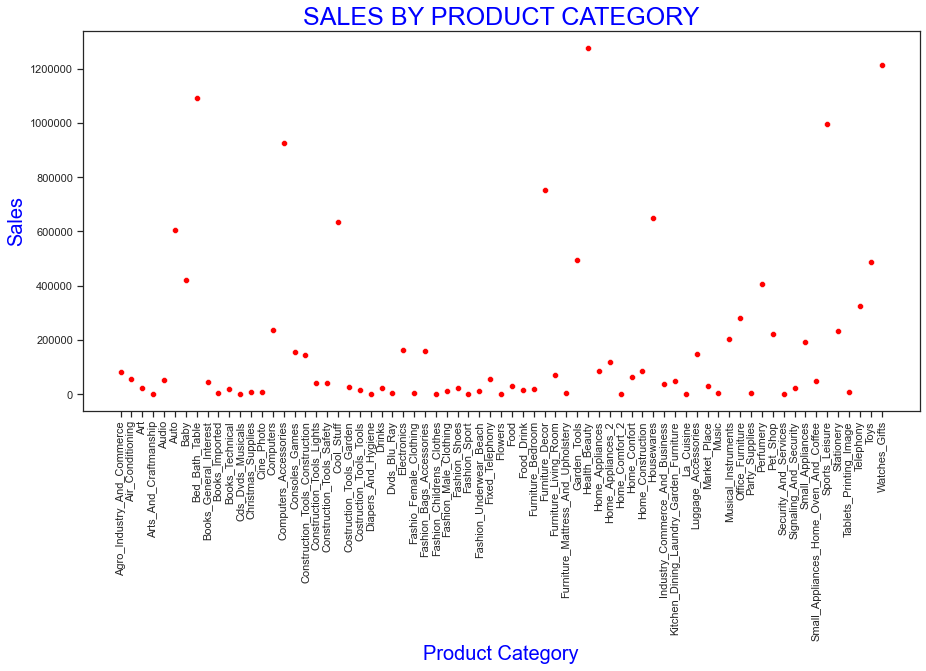

In [55]:
sales = df_final.groupby("product_category_name")[["price"]].sum().reset_index()
plt.figure(figsize=(15,7))
sns.scatterplot(x='product_category_name',y='price',data=sales,color="red")
plt.title("SALES BY PRODUCT CATEGORY",fontsize=25,color = "blue")
plt.ylabel('Sales',fontsize=20,color = "blue")
plt.xlabel('Product Category',fontsize=20,color = "blue")
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=90) # for the labels to be shows in the x axis
plt.show()

C:\Users\KUNDHAVI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


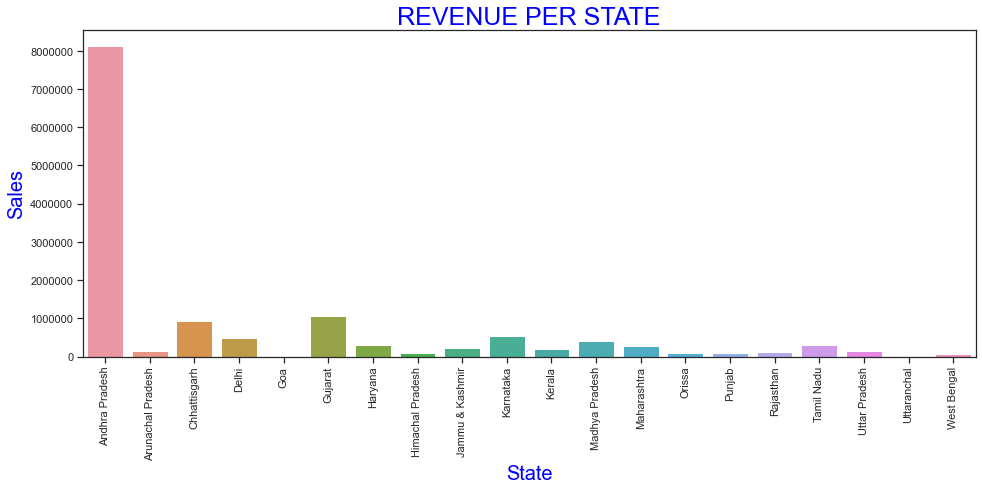

In [56]:
state=df_final.groupby('customer_state')[["price"]].sum().reset_index()
plt.figure(figsize=(16,6))
sns.barplot(state.customer_state,state.price)
plt.ticklabel_format(style='plain',axis='y')
plt.title("REVENUE PER STATE",fontsize=25,color = "blue")
plt.ylabel('Sales',fontsize=20,color = "blue")
plt.xlabel('State',fontsize=20,color = "blue")
plt.xticks(rotation=90)
plt.show()

In [57]:
df_final.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'Month', 'Year', 'Month_Year_x',
       'Month_Year_y', 'Type', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

C:\Users\KUNDHAVI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


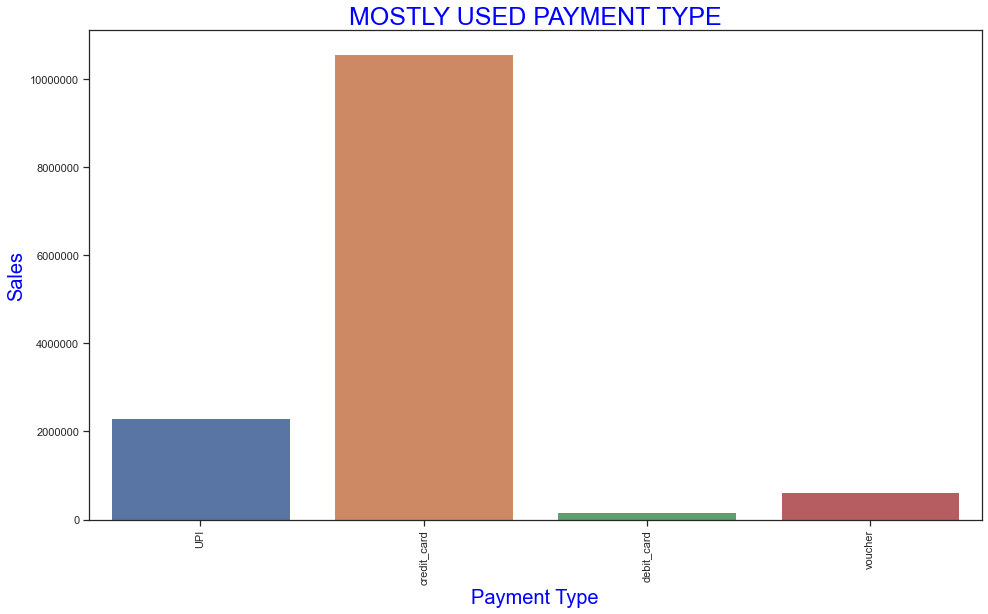

In [62]:
pay_type=df_final.groupby('payment_type')[["price"]].sum().reset_index()
plt.figure(figsize=(16,9))
sns.barplot(pay_type.payment_type,pay_type.price)
plt.ticklabel_format(style='plain',axis='y')
plt.title("MOSTLY USED PAYMENT TYPE",fontsize=25,color = "blue")
plt.ylabel('Sales',fontsize=20,color = "blue")
plt.xlabel('Payment Type',fontsize=20,color = "blue")
plt.xticks(rotation=90)
plt.show()

C:\Users\KUNDHAVI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


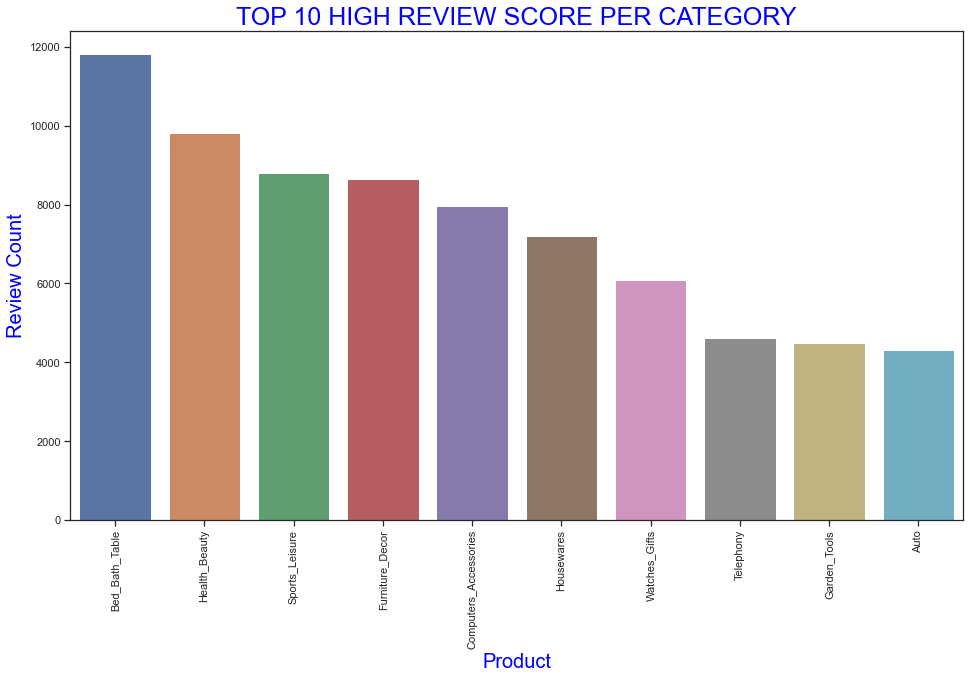

In [58]:
rev=df_final.groupby('product_category_name')[["review_score"]].count().reset_index()
rev1 = rev.sort_values(by="review_score",ascending = False).head(10)
plt.figure(figsize=(16,9))
sns.barplot(rev1.product_category_name,rev1.review_score)
plt.ticklabel_format(style='plain',axis='y')
plt.title("TOP 10 HIGH REVIEW SCORE PER CATEGORY",fontsize=25,color = "blue")
plt.ylabel('Review Count',fontsize=20,color = "blue")
plt.xlabel('Product',fontsize=20,color = "blue")
plt.xticks(rotation=90)
plt.show()

C:\Users\KUNDHAVI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


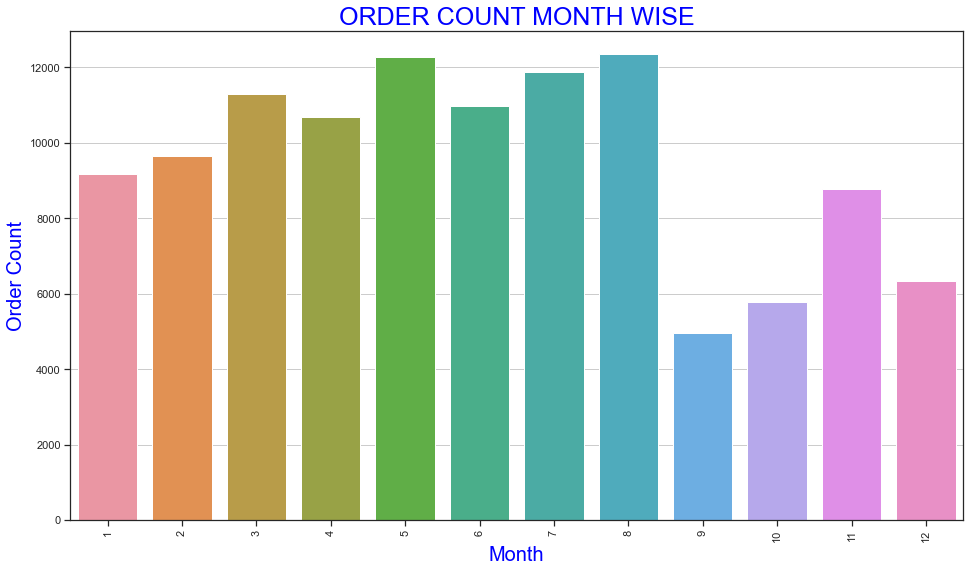

In [59]:
month=df_final.groupby('Month').order_item_id.count().reset_index()
plt.figure(figsize=(16,9))
plt.grid()
sns.barplot(month.Month,month.order_item_id)
plt.ticklabel_format(style='plain',axis='y')
plt.title("ORDER COUNT MONTH WISE",fontsize=25,color = "blue")
plt.ylabel('Order Count',fontsize=20,color = "blue")
plt.xlabel('Month',fontsize=20,color = "blue")
plt.xticks(rotation=90)
plt.show()

C:\Users\KUNDHAVI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


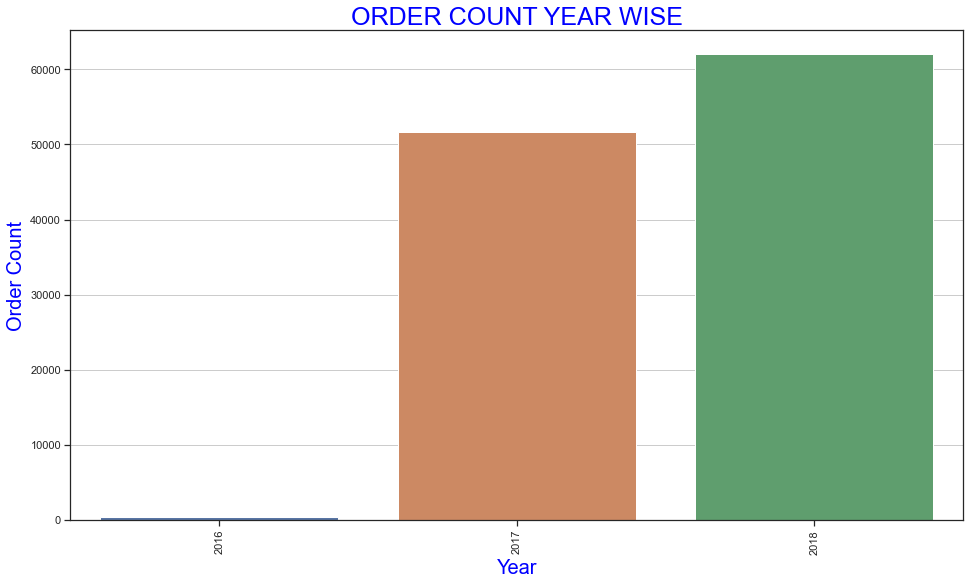

In [60]:
year=df_final.groupby('Year').order_item_id.count().reset_index()
plt.figure(figsize=(16,9))
plt.grid()
sns.barplot(year.Year,year.order_item_id)
#plt.plot(year.Year,year.order_item_id)
plt.ticklabel_format(style='plain',axis='y')
plt.title("ORDER COUNT YEAR WISE",fontsize=25,color = "blue")
plt.ylabel('Order Count',fontsize=20,color = "blue")
plt.xlabel('Year',fontsize=20,color = "blue")
plt.xticks(rotation=90)
plt.show()

# f)Popular Products by month, seller, state, category.

In [63]:
dataframe = pd.merge(df_final,seller,on="seller_id")
dataframe

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,...,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4,5/26/2017 0:00,5/30/2017 22:34,8577,Vijayawada,Andhra Pradesh
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:00,11/10/2017 0:47,11/22/2017 1:43,...,54.0,64.0,31.0,7fc63200f12eebb5f387856afdd63db8,1,11/29/2017 0:00,12/1/2017 19:41,8577,Vijayawada,Andhra Pradesh
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,Rehambal,Jammu & Kashmir,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:00,11/10/2017 0:47,11/22/2017 1:43,...,54.0,64.0,31.0,7fc63200f12eebb5f387856afdd63db8,1,11/29/2017 0:00,12/1/2017 19:41,8577,Vijayawada,Andhra Pradesh
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,Kodala,Orissa,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:00,5/8/2017 22:22,5/19/2017 20:16,...,54.0,64.0,31.0,251191809e37c1cffc16865947c18a4d,3,5/27/2017 0:00,5/28/2017 2:43,8577,Vijayawada,Andhra Pradesh
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,Anklav,Gujarat,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:00,2/4/2018 22:29,2/19/2018 18:21,...,54.0,64.0,31.0,f7123bac5b91a0e2e38d8b41fd1206f4,4,3/1/2018 0:00,3/2/2018 11:11,8577,Vijayawada,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112489,59168d27c5da6a50e3d1f03d482e80b2,393c2ace23a135d0bcc7e70167448e16,47800,Pandariya,Chhattisgarh,c382d84d35f4d874b1f1c372f4bde27c,delivered,2018-07-20 09:42:00,7/20/2018 15:05,7/23/2018 11:53,...,16.0,28.0,16.0,ad5b887e12660a77a4e7f0b5130f36f3,5,7/28/2018 0:00,7/30/2018 16:48,40285,Pedana,Andhra Pradesh
112490,eda10d7eb51a675d000956fa1aabc7dd,5c22dbb9d8b5385953f2f1e6d9d115a7,39920,Uchgaon,Maharashtra,b494f624c631105b24fe497277085909,delivered,2018-08-01 18:58:00,8/2/2018 18:50,8/3/2018 15:39,...,40.0,7.0,32.0,709ee020ff826ee5289d7dd5d6911d0c,5,8/14/2018 0:00,8/15/2018 11:31,87015,Siddipet,Andhra Pradesh
112491,b90b857a277b080d8078332b3636ab58,7f5f43a9394964ac51bc5d1e0204ead4,76400,Dundahera,Haryana,d76fe905f4588ad69ab3b36527bb267d,delivered,2018-08-18 20:59:00,8/18/2018 21:10,8/20/2018 16:49,...,36.0,53.0,22.0,6010e1ba95a9e19dc10a7b761932cf98,5,8/29/2018 0:00,8/29/2018 21:43,83015,Chunchupalle,Andhra Pradesh
112492,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,Jalda,Orissa,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:00,11/14/2017 12:15,11/27/2017 20:44,...,63.0,11.0,20.0,603f2873842a6975a43c54d305397d69,1,12/14/2017 0:00,12/16/2017 13:50,12914,Koratla,Andhra Pradesh


In [65]:
dataframe.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'Month', 'Year', 'Month_Year_x',
       'Month_Year_y', 'Type', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

C:\Users\KUNDHAVI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


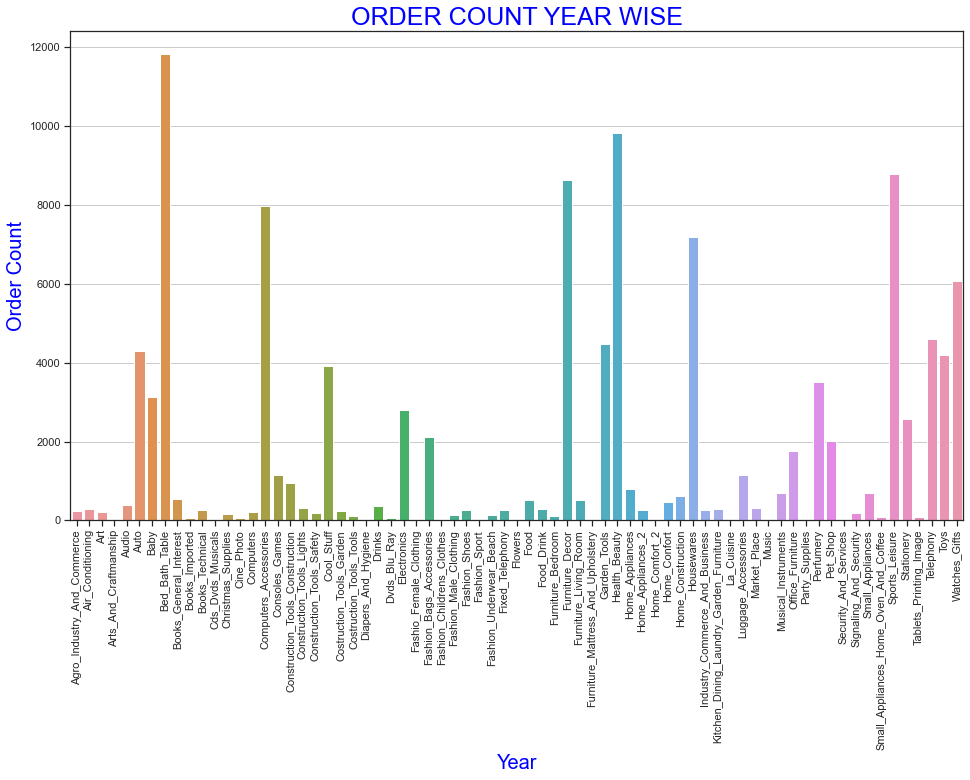

In [84]:
prod_month=df_final.groupby('product_category_name').Month_Year_x.count().reset_index()
plt.figure(figsize=(16,9))
plt.grid()
sns.barplot(prod_month.product_category_name,prod_month.Month_Year_x)
#plt.plot(year.Year,year.order_item_id)
plt.ticklabel_format(style='plain',axis='y')
plt.title("ORDER COUNT YEAR WISE",fontsize=25,color = "blue")
plt.ylabel('Order Count',fontsize=20,color = "blue")
plt.xlabel('Year',fontsize=20,color = "blue")
plt.xticks(rotation=90)
plt.show()

# g)Popular categories by state, month

In [103]:
state=dataframe.groupby(['seller_state']).product_category_name.count().reset_index()
state.sort_values(by="product_category_name",ascending=False).head(10)

,seller_state,product_category_name
0,Andhra Pradesh,77075
4,Gujarat,14861
2,Chhattisgarh,5387
5,Haryana,3348
8,Karnataka,2509
3,Delhi,2240
7,Jammu & Kashmir,1211
10,Madhya Pradesh,1047
18,West Bengal,929
14,Rajasthan,810


In [104]:
month=dataframe.groupby(['Month_Year_x']).product_category_name.count().reset_index()
month.sort_values(by="product_category_name",ascending=False).head(10)

,Month_Year_x,product_category_name
12,2017-11,8632
16,2018-03,8118
14,2018-01,8101
18,2018-05,7980
17,2018-04,7945
15,2018-02,7677
19,2018-06,7218
21,2018-08,7207
20,2018-07,7059
13,2017-12,6270


# h) List top 10 most expensive products sorted by price

In [89]:
a = dataframe.groupby(["product_category_name"])[["price"]].sum().head(10)
a.sort_values(by="price",ascending=False)

,price
product_category_name,
Bed_Bath_Table,1090628.75
Auto,595502.40
Baby,339498.33
Agro_Industry_And_Commerce,81690.78
Air_Conditioning,54186.01
Audio,52382.37
Books_General_Interest,46536.82
Art,23852.79
Books_Imported,4630.86


# 2. Performing Customers/sellers Segmentation<br>a. Divide the customers into groups based on the revenue generated <br>b. Divide the sellers into groups based on the revenue generated 

In [105]:
dataframe.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'Month', 'Year', 'Month_Year_x',
       'Month_Year_y', 'Type', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [113]:
b = dataframe.groupby("customer_unique_id").price.sum().reset_index()
b["Price_segment"] = pd.qcut(b.price,q=3,labels=["low","medium","high"])
b

,customer_unique_id,price,Price_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,medium
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,low
2,0000f46a3911fa3c0805444483337064,69.00,medium
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,low
4,0004aac84e0df4da2b147fca70cf8255,180.00,high
...,...,...,...
90796,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,high
90797,fffea47cd6d3cc0a88bd621562a9d061,64.89,medium
90798,ffff371b4d645b6ecea244b27531430a,89.90,medium
90799,ffff5962728ec6157033ef9805bacc48,115.00,medium


In [114]:
b.Price_segment.value_counts()

medium    30467
low       30447
high      29887
Name: Price_segment, dtype: int64

<AxesSubplot:>

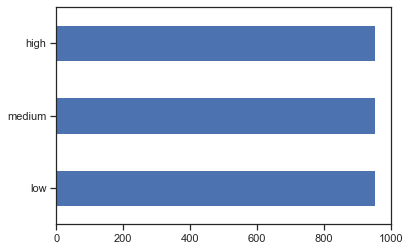

In [118]:
b.Price_segment.value_counts().plot(kind="barh")

In [123]:
b = dataframe.groupby("seller_id").price.sum().reset_index()
b["Price_segment"] = pd.qcut(b.price,q=3,labels=["low","medium","high"])
b

,seller_id,price,Price_segment
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,high
1,001cca7ae9ae17fb1caed9dfb1094831,24655.93,high
2,002100f778ceb8431b7a1020ff7ab48f,1285.20,medium
3,004c9cd9d87a3c30c522c48c4fc07416,19016.04,high
4,00720abe85ba0859807595bbf045a33b,1007.50,medium
...,...,...,...
2852,ffc470761de7d0232558ba5e786e57b7,1640.03,medium
2853,ffdd9f82b9a447f6f8d4b91554cc7dd3,2140.80,medium
2854,ffeee66ac5d5a62fe688b9d26f83f534,1839.86,medium
2855,fffd5413c0700ac820c7069d66d98c89,8833.60,high


In [124]:
b.Price_segment.value_counts()

low       953
medium    952
high      952
Name: Price_segment, dtype: int64

<AxesSubplot:>

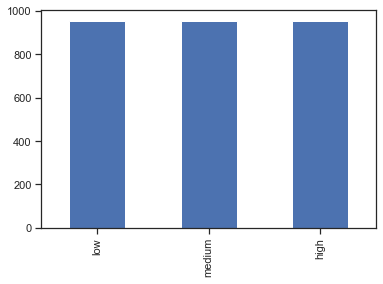

In [125]:
b.Price_segment.value_counts().plot(kind="bar")

# 3) Cross-Selling (Which products are selling together) <br> Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)

In [132]:
d = dataframe[dataframe["order_id"].duplicated(keep=False)]
e = d[["order_id","product_category_name"]]
e

,order_id,product_category_name
1,c1d2b34febe9cd269e378117d6681172,Office_Furniture
2,c1d2b34febe9cd269e378117d6681172,Office_Furniture
9,1c7fe02ac4c7be50c59afb295cf85b89,Office_Furniture
10,1c7fe02ac4c7be50c59afb295cf85b89,Office_Furniture
11,5ee63c8c9ae2e5c38791b35932cf4c69,Office_Furniture
...,...,...
112485,b13efaac3f8cb7730ba737059abc614b,Health_Beauty
112486,b13efaac3f8cb7730ba737059abc614b,Health_Beauty
112487,b13efaac3f8cb7730ba737059abc614b,Health_Beauty
112492,51c6d2f460589fa7b65f2da51e860206,Electronics


In [133]:
e["Grouped"] = e.groupby("order_id")[["product_category_name"]].transform(lambda x : "," . join(x))

C:\Users\KUNDHAVI\AppData\Local\Temp/ipykernel_3100/2071935895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e["Grouped"] = e.groupby("order_id")[["product_category_name"]].transform(lambda x : "," . join(x))


In [134]:
e.head()

,order_id,product_category_name,Grouped
1,c1d2b34febe9cd269e378117d6681172,Office_Furniture,"Office_Furniture,Office_Furniture"
2,c1d2b34febe9cd269e378117d6681172,Office_Furniture,"Office_Furniture,Office_Furniture"
9,1c7fe02ac4c7be50c59afb295cf85b89,Office_Furniture,"Office_Furniture,Office_Furniture"
10,1c7fe02ac4c7be50c59afb295cf85b89,Office_Furniture,"Office_Furniture,Office_Furniture"
11,5ee63c8c9ae2e5c38791b35932cf4c69,Office_Furniture,"Office_Furniture,Office_Furniture,Office_Furni..."


In [136]:
e = e[["order_id","Grouped"]].drop_duplicates()
e.head(50)

,order_id,Grouped
1,c1d2b34febe9cd269e378117d6681172,"Office_Furniture,Office_Furniture"
9,1c7fe02ac4c7be50c59afb295cf85b89,"Office_Furniture,Office_Furniture"
11,5ee63c8c9ae2e5c38791b35932cf4c69,"Office_Furniture,Office_Furniture,Office_Furni..."
19,27ae3ad0516a9b55f2236e24f690e01b,"Office_Furniture,Office_Furniture"
24,ff7400d904161b62b6e830b3988f5cbd,"Office_Furniture,Office_Furniture"
28,166029aa4dc1bed21f0d50ebdb4ef286,"Office_Furniture,Office_Furniture,Office_Furni..."
34,3c75044db750a89606612ed286713eb8,"Office_Furniture,Office_Furniture"
38,f964282723f7e8deef2e3054f5f790d4,"Office_Furniture,Office_Furniture"
42,a4866dfc455353f48014a2b9a86608a2,"Office_Furniture,Office_Furniture"
46,54d6f9d8f56229d3da815add65ec2408,"Office_Furniture,Office_Furniture"


In [137]:
from itertools import combinations
from collections import Counter

# Most common two 2 products selling together

In [138]:
# Most common two 2 products selling together
count = Counter()

for row in e["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)

[(('Bed_Bath_Table', 'Bed_Bath_Table'), 5893),
 (('Furniture_Decor', 'Furniture_Decor'), 4370),
 (('Housewares', 'Housewares'), 2998),
 (('Computers_Accessories', 'Computers_Accessories'), 2695),
 (('Garden_Tools', 'Garden_Tools'), 2133),
 (('Sports_Leisure', 'Sports_Leisure'), 2014),
 (('Health_Beauty', 'Health_Beauty'), 2012),
 (('Office_Furniture', 'Office_Furniture'), 1644),
 (('Bed_Bath_Table', 'Housewares'), 912),
 (('Watches_Gifts', 'Watches_Gifts'), 908)]

# Most common two 3 products selling together

In [139]:

count = Counter()

for row in e["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,3)))

count.most_common(10)

[(('Bed_Bath_Table', 'Bed_Bath_Table', 'Bed_Bath_Table'), 22279),
 (('Bed_Bath_Table', 'Bed_Bath_Table', 'Housewares'), 18088),
 (('Office_Furniture', 'Office_Furniture', 'Office_Furniture'), 9599),
 (('Bed_Bath_Table', 'Housewares', 'Housewares'), 8844),
 (('Furniture_Decor', 'Furniture_Decor', 'Furniture_Decor'), 5234),
 (('Housewares', 'Housewares', 'Housewares'), 4953),
 (('Computers_Accessories', 'Computers_Accessories', 'Computers_Accessories'),
  4866),
 (('Garden_Tools', 'Garden_Tools', 'Garden_Tools'), 4232),
 (('Health_Beauty', 'Health_Beauty', 'Health_Beauty'), 2765),
 (('Agro_Industry_And_Commerce',
   'Agro_Industry_And_Commerce',
   'Agro_Industry_And_Commerce'),
  2519)]

# 4. Payment Behaviour
a. How customers are paying?
b. Which payment channels are used by most customers?

In [146]:
dataframe.payment_type.unique()

array(['credit_card', 'UPI', 'voucher', 'debit_card'], dtype=object)

In [144]:
dataframe.payment_type.value_counts()

credit_card    83019
UPI            21870
voucher         6002
debit_card      1603
Name: payment_type, dtype: int64

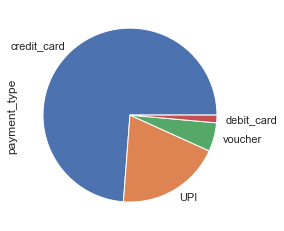

In [143]:
dataframe.payment_type.value_counts().plot(kind="pie")
plt.show()

# 5. Customer satisfaction towards category & product <br>a. Which categories (top 10) are maximum rated & minimum rated?

In [175]:
rev=dataframe.groupby('product_category_name')[["review_score"]].count().reset_index()
rev1 = rev.sort_values(by="review_score",ascending = False).head(10)
rev1

,product_category_name,review_score
7,Bed_Bath_Table,11789
43,Health_Beauty,9736
65,Sports_Leisure,8591
39,Furniture_Decor,8563
15,Computers_Accessories,7839
49,Housewares,7078
70,Watches_Gifts,6072
68,Telephony,4585
42,Garden_Tools,4446
5,Auto,4265


C:\Users\KUNDHAVI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


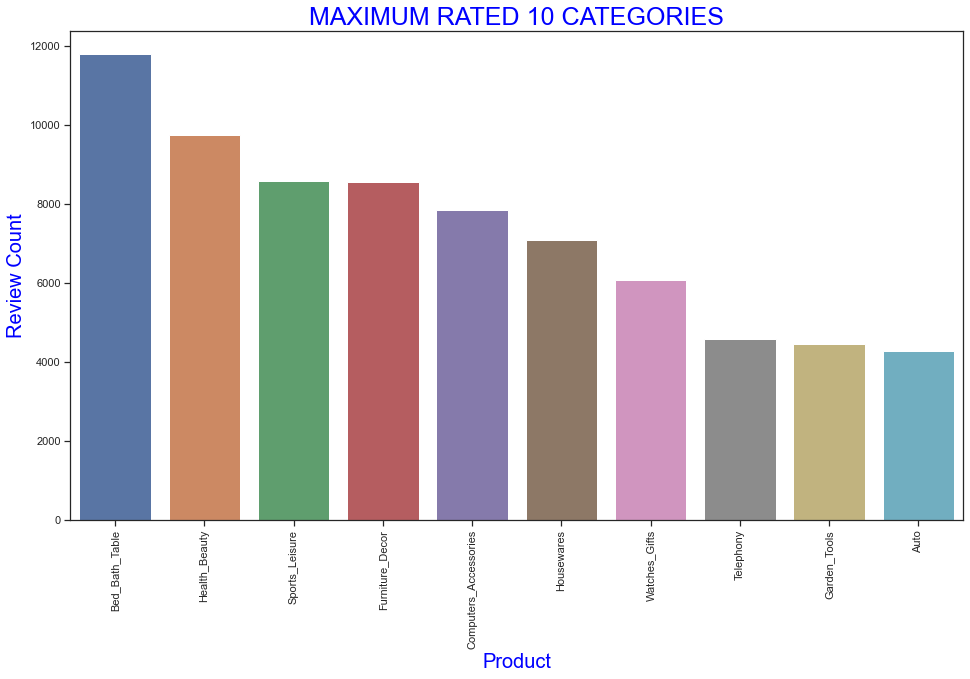

In [174]:
rev=dataframe.groupby('product_category_name')[["review_score"]].count().reset_index()
rev1 = rev.sort_values(by="review_score",ascending = False).head(10)
plt.figure(figsize=(16,9))
sns.barplot(rev1.product_category_name,rev1.review_score)
plt.ticklabel_format(style='plain',axis='y')
plt.title("MAXIMUM RATED 10 CATEGORIES",fontsize=25,color = "blue")
plt.ylabel('Review Count',fontsize=20,color = "blue")
plt.xlabel('Product',fontsize=20,color = "blue")
plt.xticks(rotation=90)
plt.show()

In [173]:
rev=dataframe.groupby('product_category_name')[["review_score"]].count().reset_index()
rev1 = rev.sort_values(by="review_score",ascending = False).tail(10)
rev1

,product_category_name,review_score
55,Music,39
23,Diapers_And_Hygiene,37
35,Flowers,33
46,Home_Comfort_2,31
32,Fashion_Sport,28
3,Arts_And_Craftmanship,24
52,La_Cuisine,14
11,Cds_Dvds_Musicals,14
29,Fashion_Childrens_Clothes,7
61,Security_And_Services,2


C:\Users\KUNDHAVI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


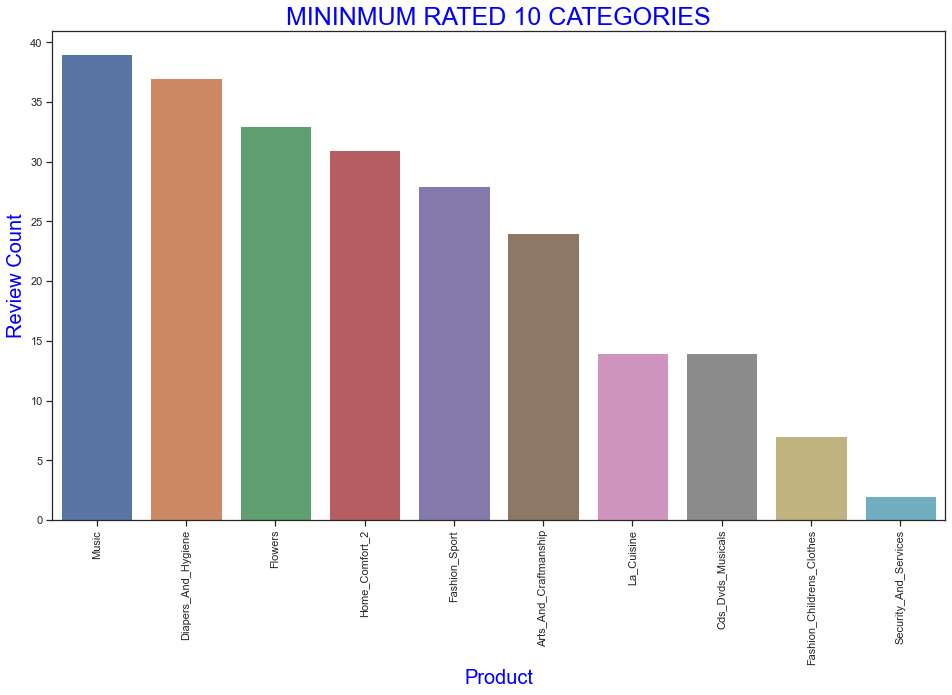

In [172]:
rev=dataframe.groupby('product_category_name')[["review_score"]].count().reset_index()
rev1 = rev.sort_values(by="review_score",ascending = False).tail(10)
plt.figure(figsize=(16,9))
sns.barplot(rev1.product_category_name,rev1.review_score)
plt.ticklabel_format(style='plain',axis='y')
plt.title("MININMUM RATED 10 CATEGORIES",fontsize=25,color = "blue")
plt.ylabel('Review Count',fontsize=20,color = "blue")
plt.xlabel('Product',fontsize=20,color = "blue")
plt.xticks(rotation=90)
plt.show()

# b) Which products (top10) are maximum rated & minimum rated?

In [171]:
pro=dataframe.groupby('product_id')[["review_score"]].count().reset_index()
pro1 = pro.sort_values(by="review_score",ascending = False).head(10)
pro1

,product_id,review_score
20875,aca2eb7d00ea1a7b8ebd4e68314663af,529
18627,99a4788cb24856965c36a24e339b6058,516
8148,422879e10f46682990de24d770e7f83d,508
6962,389d119b48cf3043d311335e499d9c6b,403
6688,368c6c730842d78016ad823897a372db,398
10232,53759a2ecddad2bb87a079a1f1519f73,391
25491,d1c427060a0f73f6b889a5c7c61f2ac4,346
10259,53b36df67ebb7c41585e8d54d6772e08,325
2642,154e7e31ebfa092203795c972e5804a6,287
7618,3dd2a17168ec895c781a9191c1e95ad7,276


In [170]:
pro=dataframe.groupby('product_id')[["review_score"]].count().reset_index()
pro1 = pro.sort_values(by="review_score",ascending = False).tail(10)
pro1

,product_id,review_score
13499,6ea7a562f5a6249001ce232582060265,1
13489,6e945cffb2e4e63d0ee8c5e7cfb717c7,1
13498,6ea7927ee9727ed48b265bfdcdbffdc1,1
13496,6ea2d74d5dd2317844dd17f16da75a5b,1
13495,6e9f9e5e78ff92b0c7ea485b416682b0,1
13494,6e9e036c6017814b391e3059fdc9d315,1
13493,6e9d34c0cf438c5a29a9a0232ffe54b6,1
13492,6e9c93e6e4a8c32527919893e8f516ab,1
13490,6e97536d81d74f5020c95ca434c850f7,1
31082,fffe9eeff12fcbd74a2f2b007dde0c58,1


# c) Average rating by location, seller, product, category, month etc

In [167]:
dataframe.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'Month', 'Year', 'Month_Year_x',
       'Month_Year_y', 'Type', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [179]:
dataframe.groupby('seller_state')[["review_score"]].mean().sort_values(by="review_score",ascending=False)


,review_score
seller_state,
Uttaranchal,4.596774
Kerala,4.299611
Orissa,4.256098
West Bengal,4.214209
Himachal Pradesh,4.194748
Arunachal Pradesh,4.185233
Chhattisgarh,4.184704
Madhya Pradesh,4.130850
Haryana,4.120669


In [190]:
dataframe.groupby('seller_city')[["review_score"]].mean().sort_values(by="review_score",ascending=False)



,review_score
seller_city,
Vapi INA,5.0
Kalanaur,5.0
Farrukhnagar,5.0
Gajapathinagaram,5.0
Jind,5.0
...,...
Galiakot,1.0
Jintur,1.0
Sihor,1.0


In [191]:
dataframe.groupby('product_category_name')[["review_score"]].mean().sort_values(by="review_score",ascending=False)

,review_score
product_category_name,
Fashion_Childrens_Clothes,5.000000
Cds_Dvds_Musicals,4.642857
Books_Imported,4.525424
Books_General_Interest,4.494505
Small_Appliances_Home_Oven_And_Coffee,4.453333
...,...
Fashion_Male_Clothing,3.630435
Office_Furniture,3.484230
Home_Comfort_2,3.387097


In [196]:

dataframe.groupby('Month_Year_x')[["review_score"]].mean().sort_values(by="review_score",ascending=False)

,review_score
Month_Year_x,
2016-12,5.000000
2017-08,4.259237
2018-07,4.256410
2018-08,4.234217
2018-06,4.202411
2017-01,4.183525
2017-05,4.181313
2017-06,4.175751
2017-09,4.175687
